<a href="https://colab.research.google.com/github/an-96/advanced-python-working-with-data-4312001/blob/main/Pricing_Project_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Import libraries for data manipulation, normalization, clustering, and visualization
import pandas as pd  # For data manipulation
from sklearn.preprocessing import StandardScaler  # For scaling (normalization)
from sklearn.cluster import KMeans  # For K-means clustering
from sklearn.metrics import silhouette_score  # For silhouette score
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations
import numpy as np  # For numerical operations

# Load the data
data = pd.read_csv("/Pricing data_2.csv")  # File path
print(data)

    UID  Too Expensive  Too Cheap  Cheap  Expensive
0     1             25          5     15         20
1     2             25          5     15         20
2     3             15          2      5         10
3     4             30          1      6         12
4     5             50          6     14         16
5     6             15          0      1          5
6     7             40         20      5         25
7     8             25          5     10         15
8     9              1          0      0          1
9    10             40         10     20         30
10   11             35          5     15         25
11   12             40          5     10         20
12   13             25         10     15         17
13   14             25          5     15         20
14   15             70          5     15         40
15   16             20          2      5         12
16   17             25         10     15         21
17   18             25          5     12         20
18   19     

In [34]:
# Select relevant columns and normalize them
scaler = StandardScaler()
data_normalized = data[['Too Expensive', 'Too Cheap', 'Cheap', 'Expensive']]
data_normalized = pd.DataFrame(scaler.fit_transform(data_normalized), columns=data_normalized.columns)

# Check the first few rows of the normalized data
print(data_normalized.head())

   Too Expensive  Too Cheap     Cheap  Expensive
0      -0.090989   0.083624  0.879520   0.537793
1      -0.090989   0.083624  0.879520   0.537793
2      -0.648067  -0.668994 -0.903291  -0.666221
3       0.187549  -0.919866 -0.725010  -0.425418
4       1.301704   0.334497  0.701239   0.056187


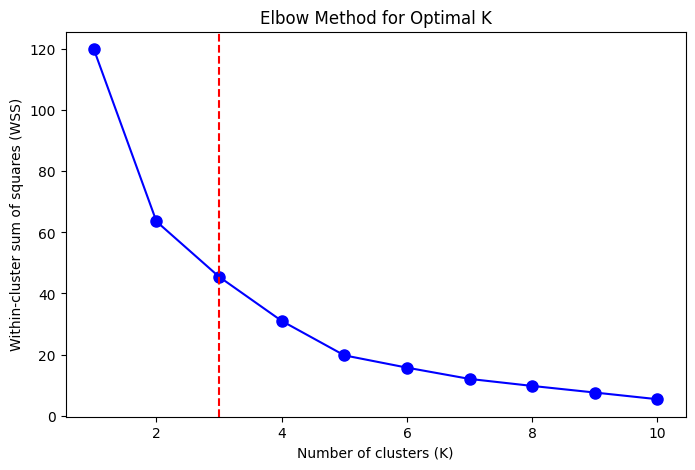

In [36]:
# Elbow method to find the optimal K
wss = []
K = range(1, 11)  # Test K values from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=123)
    kmeans.fit(data_normalized)
    wss.append(kmeans.inertia_)  # Inertia is WSS

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, wss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method for Optimal K')
plt.axvline(x=3, linestyle='--', color='red')  # Marking the chosen K (3)
plt.show()



In [37]:


# Apply K-means with the optimal number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
kmeans.fit(data_normalized)

KMeans(n_clusters=3, n_init=25, random_state=123)

In [38]:


# Calculate the silhouette score
sil_score = silhouette_score(data_normalized, kmeans.labels_)
print(f'Silhouette Score for K=3: {sil_score}')

Silhouette Score for K=3: 0.4255940201980615


In [39]:
# Fit K-means with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
data['cluster'] = kmeans.fit_predict(data_normalized)

# Display the first few rows with cluster assignments
print(data.head())

   UID  Too Expensive  Too Cheap  Cheap  Expensive  cluster
0    1             25          5     15         20        2
1    2             25          5     15         20        2
2    3             15          2      5         10        1
3    4             30          1      6         12        1
4    5             50          6     14         16        2


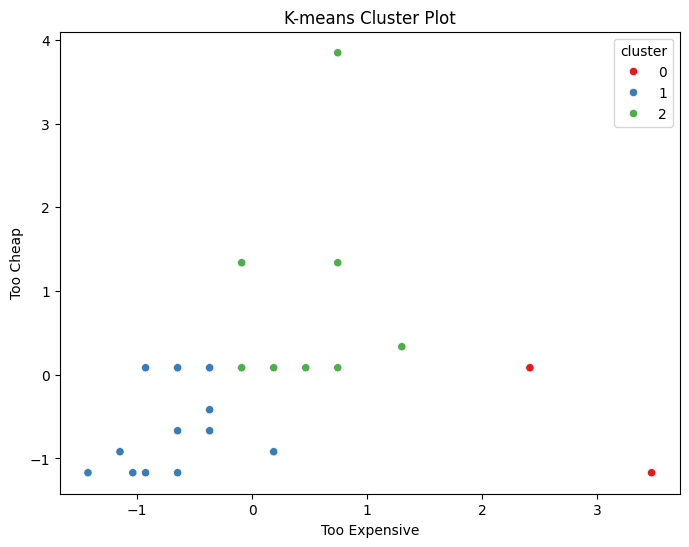

In [40]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_normalized['Too Expensive'], y=data_normalized['Too Cheap'], hue=data['cluster'], palette='Set1')
plt.title("K-means Cluster Plot")
plt.xlabel("Too Expensive")
plt.ylabel("Too Cheap")
plt.show()

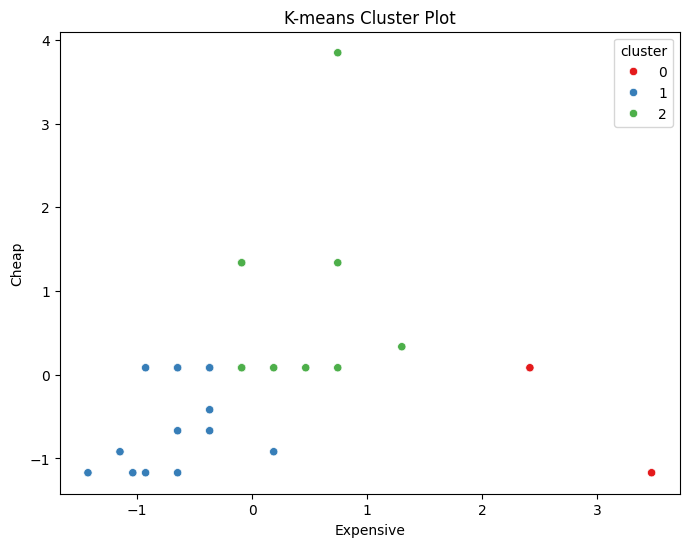

In [46]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_normalized['Too Expensive'], y=data_normalized['Too Cheap'], hue=data['cluster'], palette='Set1')
plt.title("K-means Cluster Plot")
plt.xlabel("Expensive")
plt.ylabel("Cheap")
plt.show()

In [47]:


# Summarize cluster characteristics
cluster_summary = data.groupby('cluster').agg({
    'Too Expensive': 'mean',
    'Too Cheap': 'mean',
    'Cheap': 'mean',
    'Expensive': 'mean'
}).reset_index()

print(cluster_summary)


   cluster  Too Expensive  Too Cheap      Cheap  Expensive
0        0      79.500000   2.500000  15.000000  31.000000
1        1      14.642857   2.428571   5.428571   8.571429
2        2      31.071429   7.214286  14.000000  20.285714


In [48]:
# Calculate average CLV by cluster
clv_summary = data.groupby('cluster').agg(avg_CLV=('Too Expensive', lambda x: x.sum() / x.nunique()))
print(clv_summary)



           avg_CLV
cluster           
0        79.500000
1        29.285714
2        87.000000


In [49]:
clv_summary = data.groupby('cluster').agg(avg_CLV=('Too Cheap', lambda x: x.sum() / x.nunique()))
print(clv_summary)


         avg_CLV
cluster         
0           2.50
1           6.80
2          25.25


In [50]:
clv_summary = data.groupby('cluster').agg(avg_CLV=('Cheap', lambda x: x.sum() / x.nunique()))
print(clv_summary)

           avg_CLV
cluster           
0        30.000000
1         7.600000
2        32.666667


In [51]:
clv_summary = data.groupby('cluster').agg(avg_CLV=('Expensive', lambda x: x.sum() / x.nunique()))
print(clv_summary)

           avg_CLV
cluster           
0        31.000000
1        17.142857
2        40.571429


In [ ]:
# Thus we can conclude that Cluster 2 has the highest CLV among the three clusters in all four variables

# Key Takeaways:
# Data normalization ensures fair comparisons between variables.
# The Elbow method helps select the number of clusters, while the silhouette score confirms the quality of clustering.
# Cluster assignments categorize similar data points together, and you can visualize how well-separated the clusters are.
# Cluster summaries provide actionable insights for each segment, helping with targeted strategies like marketing or resource allocation.
# Ongoing monitoring of clusters allows you to stay adaptive to changes in customer behavior, improving long-term business outcomes.